<a href="https://www.kaggle.com/code/kavya2099/heart-attack-analysis-prediction?scriptVersionId=165859911" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df= pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df1= pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')

**About Dataset**

Age : Age of the patient

Sex: The person’s sex (1 = male, 0 = female)


cp: chest pain type

— Value 0: asymptomatic

— Value 1: atypical angina

— Value 2: non-anginal pain

— Value 3: typical angina


trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

chol: The person’s cholesterol measurement in mg/dl

fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: resting electrocardiographic results

— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

— Value 1: normal

— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach: The person’s maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

ca: The number of major vessels (0–3)

thal: A blood disorder called thalassemia 

Value 0: NULL (dropped from the dataset previously

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)

target: Heart disease (1 = no, 0= yes)

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df1.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


# **EDA**

Let's start with exploring the features which influence the output 


Data types of df

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
#checking for null values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [8]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df1.shape

(3585, 1)

# Exploratory Data Analysis

## Univariate Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 

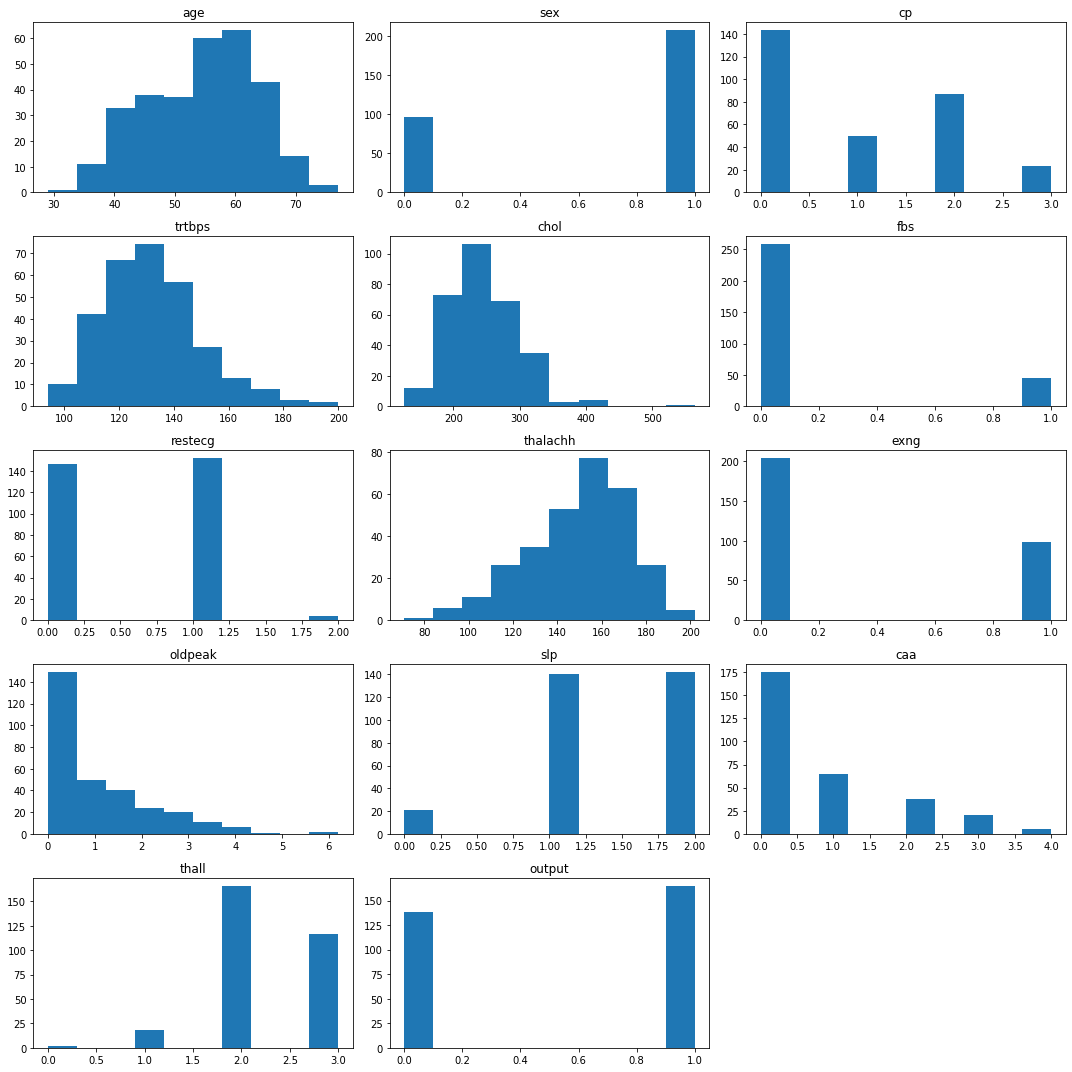

In [12]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    # Plot a histogram of the feature in the current subplot
    axs[i].hist(df[feature])
    axs[i].set_title(feature)
fig.delaxes(axs[-1])

# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

* Dataset contains more patient records of age around **55-65**
* **Male** patient records are more compared to female ones
* Chest pain type of **asymptomatic** has been common from patient records
* The person’s resting blood pressure values are common between **120-140** mm Hg
* Common person’s cholesterol measurement in mg/dl is between **200-300** with highest around **250**
* The person’s fasting blood sugar **< 120 mg/dl** is more
* Slope of peak exercise has more records with **downsloping** value
* The number of major vessels recorded here is **0**
* Most people had **normal blood flow** and **few had reversible defect** (a blood flow is observed but it is not normal) related to thalassemia record
* Most of the resting electrocardiographic results shows **probable or definite left ventricular hypertrophy by Estes’ criteria** or **normal**
* The person’s maximum heart rate achieved are around **140-180** with maximum values around **150-160**
* Exercise induced angina in records shows mostly **no**


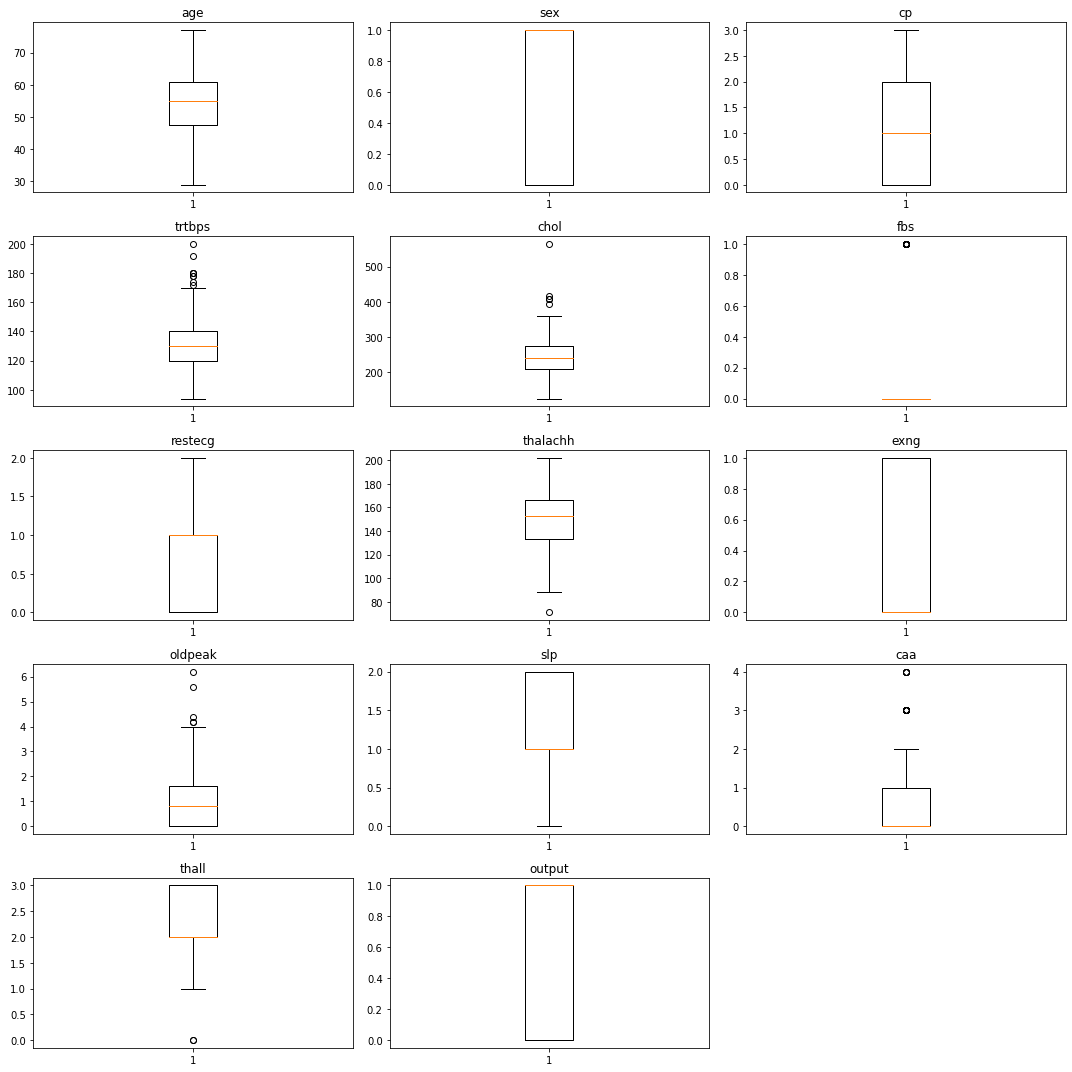

In [13]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

## Treating outliers

Since we can see outliers in the upper limit side, we are treating only those for the below mentioned features

In [14]:
features=['trtbps', 'chol', 'oldpeak' ]
for i in features:
    #lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    #df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  trtbps
Skewness value:  -0.1352012741271468


Feature:  chol
Skewness value:  -0.09844908240560264


Feature:  oldpeak
Skewness value:  0.6346192009549019




Features after outlier treatment

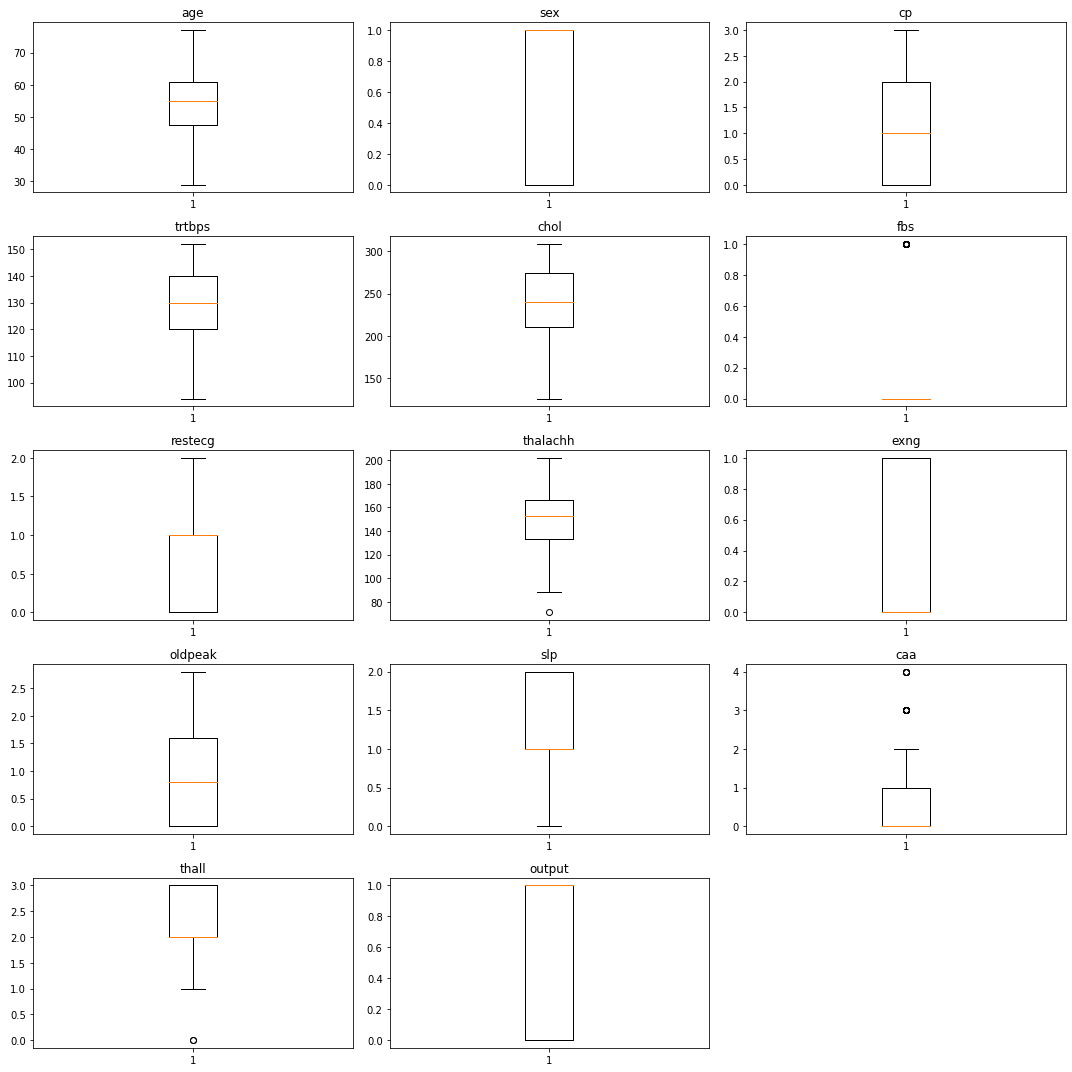

In [15]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

## Bivariate Analysis

Since we have continous numerical as well as categorical numerical values, we will analyse it separately with the target output to identify the relationship

In [16]:
#continous numerical variables
bi_num=['age', 'trtbps', 'chol',   'thalachh',
        'oldpeak' ]

In [17]:
#categorical numerical variables
cat=['sex', 'cp','fbs','restecg','exng','slp', 'caa', 'thall']

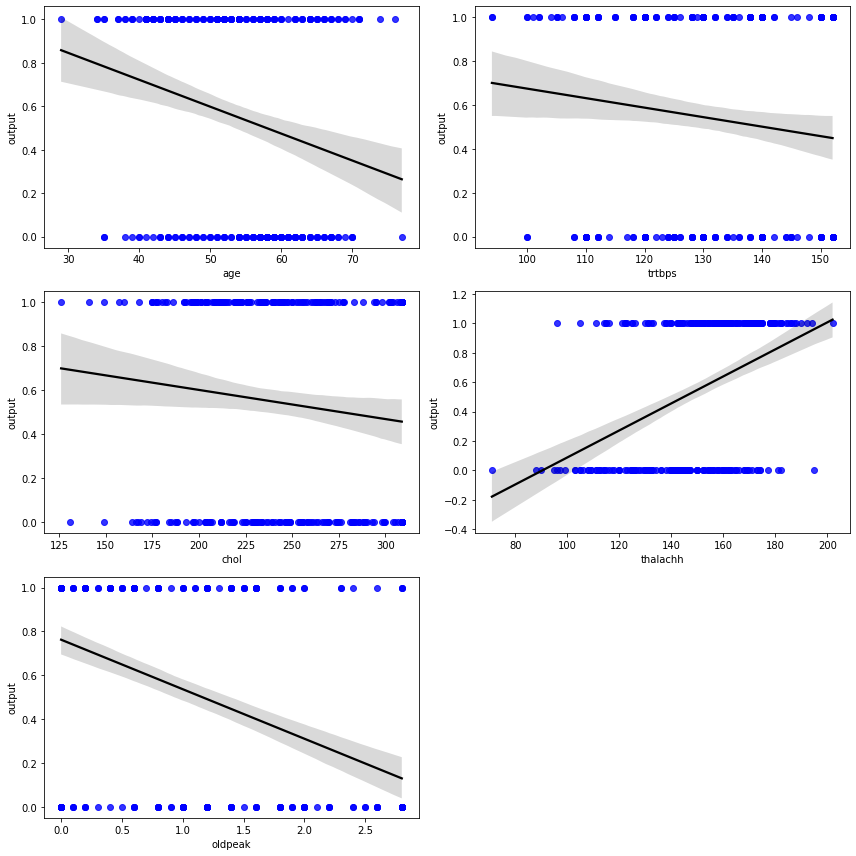

In [18]:
ig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.ravel()

# Plot the regression for each feature
for i, col in enumerate(bi_num):
    sns.regplot(x=col, y='output', data=df, ax=axs[i], color='black', scatter_kws={"color": "blue"})

ig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


Except **oldpeak**: ST depression induced by exercise relative to rest which has positive correlation, all the other mentioned features have negative correlation.

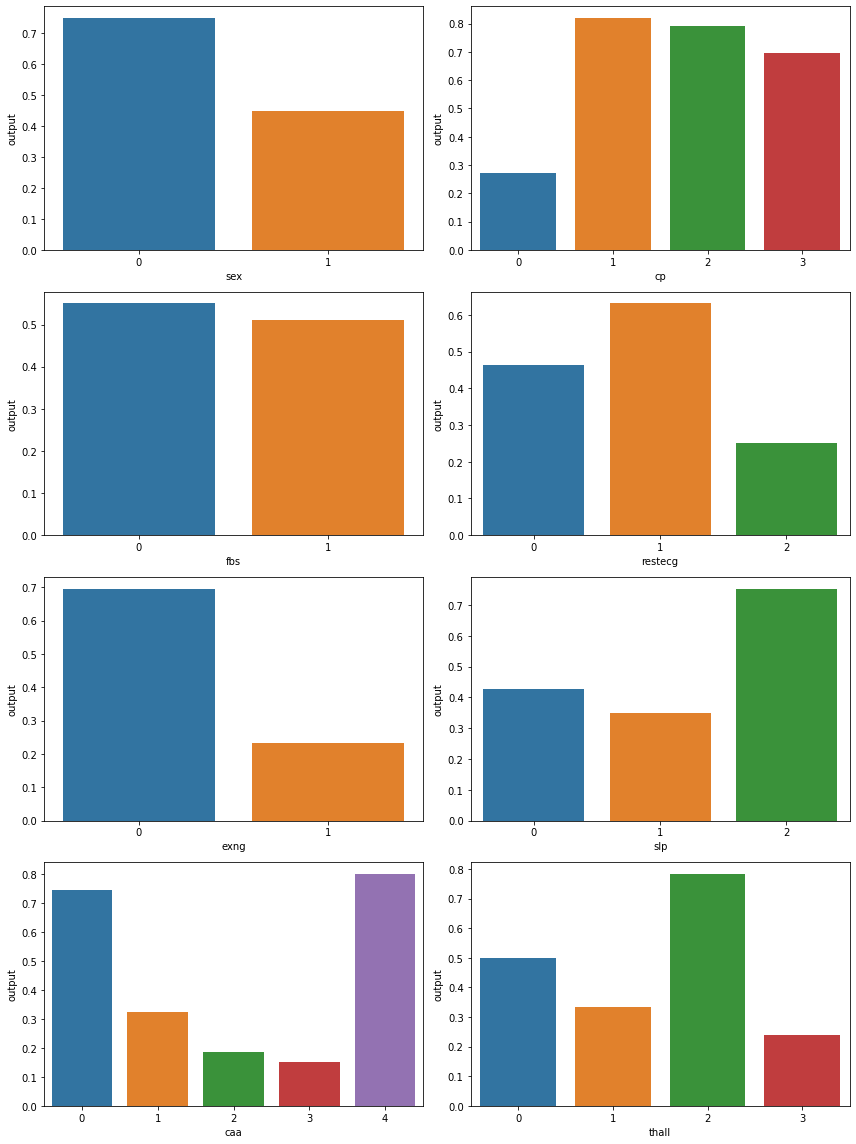

In [19]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.ravel()

# Loop through each column in cat
for i, col in enumerate(cat):
    sns.barplot(x=col, y='output', data=df, ax=axs[i], ci=None)

plt.tight_layout()
plt.show()

# Mutual Information

In [20]:
X= df.drop('output',axis=1)
y= df.output

In [21]:
#using mutual_info_classif for classification problem MI
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

thall       0.142098
exng        0.119189
oldpeak     0.100817
cp          0.099392
caa         0.076743
slp         0.075944
chol        0.071457
thalachh    0.071313
age         0.015730
sex         0.014921
fbs         0.011518
trtbps      0.009877
restecg     0.000000
Name: MI Scores, dtype: float64

cp, thall, exng, slp and caa are the top 5 features which are dependant with output feature.

Age, trtbps and restecg does not have any dependancy.

We'll train and test with top 6 features and test the accuracy and then with all the features and test the accuracy and auc score

# Test train split

In [22]:
from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

# Minmax scaling 

In [23]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

Lets start with **decision tree**

# Decison Tree

## 1. With top 7 features

In [24]:
model=[]

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#assigning the features under a list

features=['thall','caa','cp','oldpeak','exng','chol','thalachh']
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

tree_model= DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
preds= tree_model.predict(X_val)

a='Decision Tree with top 7'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))



ACCURACY:  77.04918032786885
AUC score:  0.7712418300653595


## 2. Let's try with all features

In [26]:
X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

tree_model= DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
preds= tree_model.predict(X_val)

a='Decision Tree with all features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  72.1311475409836
AUC score:  0.7156862745098039


The accuracy and AUC has improved when we train with all the features in decision tree model. 

Next we'll make use of the parameters in decision tree model

## 3. Decision tree with parameter tuning with top 7 features 

In [27]:
features=['thall','caa','cp','oldpeak','exng','chol','thalachh']
X= df[features]
y= df.output

depth = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
leaf=[1, 5, 10, 15, 20, 500, 100, 200]
scores=[]
for d in depth:
      for l in leaf:
        dmodel = DecisionTreeClassifier(random_state=0,max_depth=d,min_samples_leaf=l)
        dmodel.fit(X_train, y_train)

        pred1 = dmodel.predict(X_val)
        acc= accuracy_score(y_val,pred1)*100
        auc = roc_auc_score(y_val,pred1)
        #print('%4s %s -> auc %.3f accuracy  %.2f' % (d, l, auc, acc))

        scores.append((d,l,auc))

In [28]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

pivot2 = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
pivot2.round(3)

auc                                                   \
max_depth           NaN   1.0    2.0    3.0    4.0    5.0    6.0    10.0   
min_samples_leaf                                                           
1                 0.738  0.686  0.756  0.738  0.797  0.767  0.730  0.738   
5                 0.808  0.686  0.756  0.738  0.808  0.808  0.808  0.808   
10                0.738  0.686  0.756  0.738  0.738  0.738  0.738  0.738   
15                0.756  0.686  0.756  0.756  0.756  0.756  0.756  0.756   
20                0.756  0.686  0.756  0.756  0.756  0.756  0.756  0.756   
100               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   
200               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   
500               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   

                                
max_depth          15.0   20.0  
min_samples_leaf                
1                 0.738  0.738  
5                 0.808  0.808  
10                0.738  0.738  
15                0.756  0.756  
20                0.756  0.756  
100               0.500  0.500  
200               0.500  0.500  
500               0.500  0.500

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

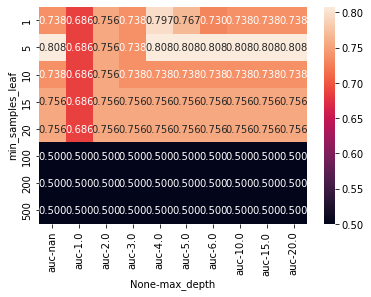

In [29]:
import seaborn as sns
sns.heatmap(pivot2, annot=True, fmt=".3f")

We are getting high auc score when min_samples_leaf=5 and max_depth to be between 4-20 since we have same auc score
Finalizing parameters


In [30]:
#finalized decision tree model
features=['thall','caa','cp','oldpeak','exng','chol','thalachh']
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

tree_model= DecisionTreeClassifier(random_state=1,max_depth=5,min_samples_leaf=5)
tree_model.fit(X_train, y_train)
preds= tree_model.predict(X_val)

a='Decision Tree with parameter tuning'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  81.9672131147541
AUC score:  0.8306100217864923


With parameter tuning, results are improved

# Random forest

## 4. **Random forest** classifier with top 7 features

In [31]:
from sklearn.ensemble import RandomForestClassifier

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

a='Random Forest with top 7'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8523965141612201


## 5. **Random forest** with all features

In [32]:
X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

a='Random Forest with all features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8523965141612201


In Random forest, both versions provides same results. So we'll just go with top 7 features included

## 6. Random forest with parameter tuning with top 7 features included 

In [33]:
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

#determing depth
depth=[5,10,15,20]
score=[]
score1=[]
for d in depth:
       for n in range(10,201,10):


        rmodel = RandomForestClassifier(n_estimators=n,random_state=1,max_depth=d)
        rmodel.fit(X_train, y_train)

        pred = rmodel.predict(X_val)
        acc= accuracy_score(y_val,pred)*100
        auc = roc_auc_score(y_val,pred)

        #print('%4s %s  %.2f %.3f'%(n,d,acc,auc))
        score.append((d,n,auc))
        
#creating dataframe
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(score, columns=columns)
        

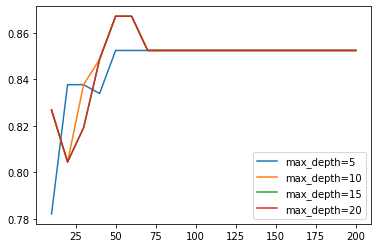

In [34]:
import matplotlib.pyplot as plt
for d in depth:
    subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(subset.n_estimators, subset.auc,label='max_depth=%d' % d)

plt.legend()

choosing max depth= 20 and we get highest auc score with that depth

In [35]:
depth= 20
#getting samples
score1=[]

samples=[1,5,10,25,30,50]
for s in samples:
       for n in range(10,201,10):


        rmodel = RandomForestClassifier(n_estimators=n,random_state=1,max_depth=depth,min_samples_leaf=s)
        rmodel.fit(X_train, y_train)

        pred = rmodel.predict(X_val)
        acc= accuracy_score(y_val,pred)*100
        auc = roc_auc_score(y_val,pred)

        #print('%4s %s  %.2f %.3f'%(n,d,acc,auc))
        #score.append((d,n,acc))
        score1.append((s,n,auc))
        
        
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(score1, columns=columns)

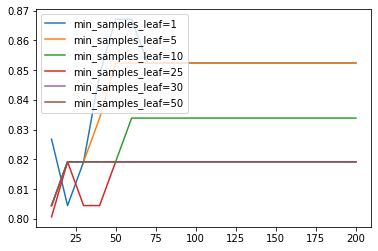

In [36]:
for s in samples:
    subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(subset.n_estimators, subset.auc,
             label='min_samples_leaf=%d' % s)

plt.legend()

We are reaching maximum auc score when min_samples_leaf=1, with estimators between 25-40

In [37]:
## finalized paramter values 

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(n_estimators=27,random_state=11,max_depth=20,min_samples_leaf=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

a='Random Forest with parameter tuning'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8523965141612201


Same Accuracy and auc score after parameter tuning

# XGB classifer

## 7. **XGB classifer** with top 7 features

In [38]:
from xgboost import XGBClassifier

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
a='XCB with with top 7 features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8523965141612201


## 8. XCB classifier with all features

In [39]:
X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
a='XGB with all features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8523965141612201


Results were almost same for XGB classifier for both categories. We'll take with top 7 features as it give a higher auc score and apply parameter tuning

## 9. XCB model with parameter tuning with top 7 features

In [40]:
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

estimators=[50,100,150,200,250,300]
depth=[2,3,4,5,6]

score=[]
score1=[]

for d in depth:
     for n in estimators:
        xgb_model = XGBClassifier(learning_rate=0.05,n_estimators=n,max_depth=d)

        xgb_model.fit(X_train, y_train)
        prediction_xgb = xgb_model.predict(X_val)
        acc= accuracy_score(y_val,prediction_xgb)*100
        auc = roc_auc_score(y_val,prediction_xgb)

        score1.append((n,d,auc))
        
        
#making it as dataframe
columns = ['n_estimators', 'max_depth', 'auc']
df_scores = pd.DataFrame(score1, columns=columns)

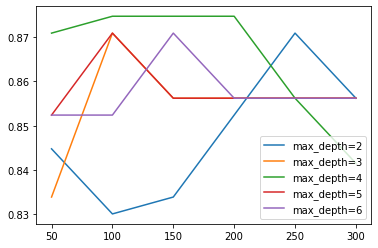

In [41]:
for d in depth:
    subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(subset.n_estimators, subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [42]:
#picking max_depth=4 and estimators range between 100-200 --> 190

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model = XGBClassifier(learning_rate=0.05,n_estimators=190,max_depth=4)
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
a='XGB with parameter tuning'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8523965141612201


# Selecting Final model

In [43]:

columns=['models','Accuracy','ROC']
model= pd.DataFrame(model, columns=columns)
model

,models,Accuracy,ROC
0,Decision Tree with top 7,77.0492,0.7712
1,Decision Tree with all features,72.1311,0.7157
2,Decision Tree with parameter tuning,81.9672,0.8306
3,Random Forest with top 7,85.2459,0.8524
4,Random Forest with all features,85.2459,0.8524
5,Random Forest with parameter tuning,85.2459,0.8524
6,XCB with with top 7 features,85.2459,0.8524
7,XGB with all features,85.2459,0.8524
8,XGB with parameter tuning,85.2459,0.8524


Finalizing XCB classifier model as final model

In [44]:
#training with 80% of data --> X_full_train

X= df[features]
y= df.output

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

X= scale(X)


xgb_model = XGBClassifier(learning_rate=0.05,n_estimators=190,max_depth=6)
xgb_model.fit(train_full_X, train_full_y)
prediction_xgb = xgb_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(test_y,prediction_xgb))

ACCURACY:  83.60655737704919
AUC score:  0.8300653594771241


In [45]:
import pickle
# save the model to disk
file_name = "xgb_model.bin"
xgb_model.save_model(file_name)

References:

https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7